In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
model = neighbors.KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [6]:
accuracy_score(y, y_model)

1.0

In [7]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5, test_size=0.5)

In [8]:
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [9]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1,y1_model), accuracy_score(y2,y2_model)

(0.96, 0.9066666666666666)

In [10]:
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [11]:
cv = LeaveOneOut()
cv.get_n_splits(X)
score = cross_val_score(model,X,y,cv=cv)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
score.mean()

0.96

In [27]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [14]:
def make_data(N,err=1.0,rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10-1. / (X.ravel()+0.1)
    if err > 0:
        y += err*rng.randn(N)
    return X,y

In [15]:
X,y=make_data(40)

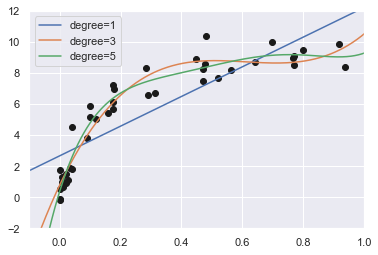

In [16]:
X_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(), y, color='k')
axis=plt.axis()
for degree in [1,3,5]:
    y_test = PolynominalRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best');

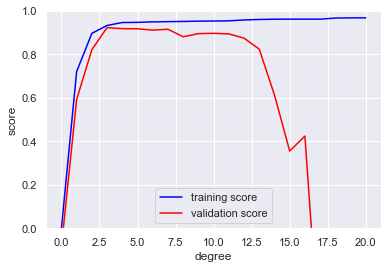

In [17]:
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynominalRegression(),X, y,'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score,1),color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

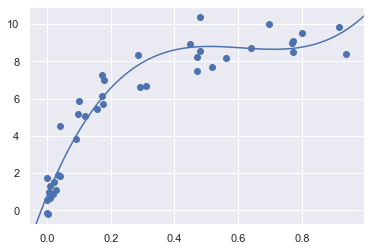

In [18]:
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=PolynominalRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test);
plt.axis(lim);

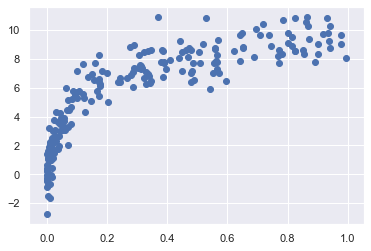

In [19]:
X2,y2=make_data(200)
plt.scatter(X2.ravel(),y2);

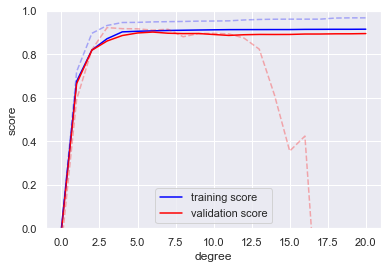

In [20]:
degree = np.arange(21)
train_score2,val_score2 = validation_curve(PolynominalRegression(),X2,y2,'polynomialfeatures__degree',degree,cv=7)
plt.plot(degree,np.median(train_score2,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score2,1),color='red',label='validation score')
plt.plot(degree,np.median(train_score,1),color='blue',alpha=0.3,linestyle='dashed')
plt.plot(degree,np.median(val_score,1),color='red',alpha=0.3,linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

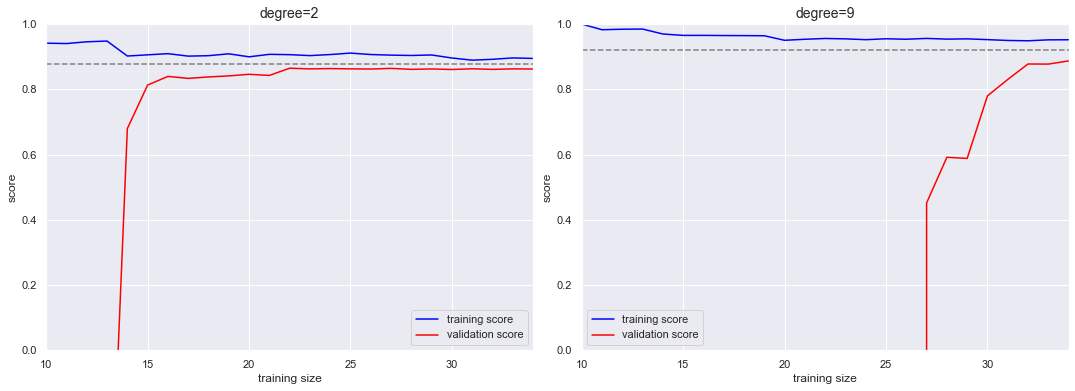

In [21]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for i,degree in enumerate([2,9]):
    N,train_lc,val_lc=learning_curve(PolynominalRegression(degree),X,y,cv=7,train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N,np.mean(train_lc,1),color='blue',label='training score')
    ax[i].plot(N,np.mean(val_lc,1),color='red',label='validation score')
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1],color='gray',linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree={0}'.format(degree),size=14)
    ax[i].legend(loc='best')

In [28]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [30]:
grid.fit(X,y);

C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


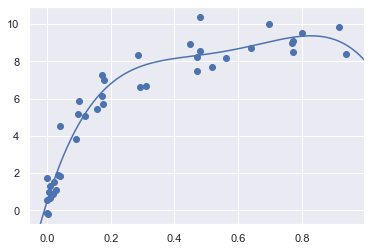

In [32]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);